# Intro to Generative AI - LAB Slice Wasserstein
**Student**: Tristan Waddington

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import slice_code_student
from importlib import reload

reload(slice_code_student)

<module 'slice_code_student' from '/Users/tristanwaddington/Documents/Informatique/Git_reps/M2DS_2024-2025/20.Into-GenAI/Labs/LAB1_assignment_1_SW/slice_code_student.py'>

## First assignement 

Recall that the slice Wasserstein distance between $\mu$ and $\nu$ defined on $\mathbb{R}^p$ is defined as 
$$
SW_1(\mu,\nu) = \int d \sigma_S(v) W_1(v_{\sharp} \mu, v_{\sharp}\nu),
$$
where $v_{\sharp} \mu$ is the distribution of $v^{\top} X$ is $X$ distributed according to $\mu$ and similarly for $\nu$.

Finally, given two univariate Gaussians $\mu_1 = N\left(m_1, \sigma_1^2\right)$ and $\mu_2 = N\left(m_2, \sigma_2^2\right)$ the 1 Wasserstein distance is equal to the mean of a folded Gaussian $E[|Y|]$ where $Y \sim N\left(m_y=m_1-m_2, \sigma_y^2=\right.$ $\left.\left(\sigma_1-\sigma_2\right)^2\right):$
$$
\begin{aligned}
W_1\left(\mu_1, \mu_2\right)=\left|m_y\right| & {\left[1-2 \Phi_N\left(-\frac{\left|m_y\right|}{\left|\sigma_y\right|}\right)\right] } +\left|\sigma_y\right| \sqrt{\frac{2}{\pi}} \exp \left(-\frac{m_y^2}{2 \sigma_y^2}\right).
\end{aligned}
$$

We recall that as soon as your do Monte Carlo, replications and uncertainty quantification is a must! 


Q1. Complete the function slice_wasserstein_gaussian in slice_code_student.py based on the previous result 

Q2. Illustrate your implementation for $m_1 = \boldsymbol{0}$ and $m_2 = \boldsymbol{1}$, $\sigma_1 = \sigma_2 = \mathrm{Id}$ for dimensions $d=1,2,5$ using $10000$ samples.

Dim: 1, 	swd1=1.16663 +/- 4.930e-32
Dim: 2, 	swd1=1.39407 +/- 2.692e-06
Dim: 5, 	swd1=1.95644 +/- 1.653e-06


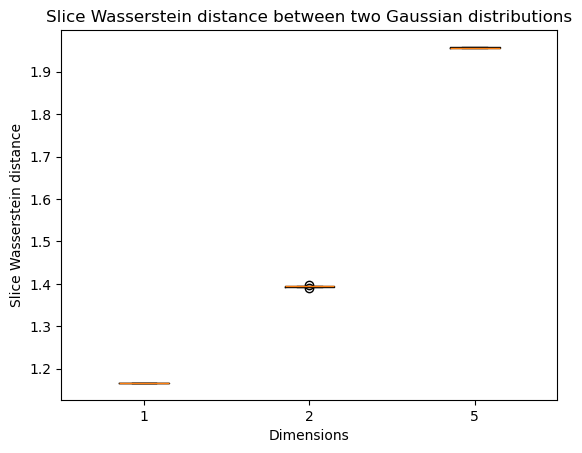

In [6]:
# Calculate the Wasserstein distance between two Gaussian distributions in different dimensions
n_MC_simulations = 10
dimensions = [1, 2, 5]
n_samples = 10_000
swd1_results = []
for d in dimensions:
    mu1 = np.array([0] * d)
    mu2 = np.array([1] * d)
    sigma = np.eye(d)
    swd1 = [
        slice_code_student.slice_wasserstein_gaussian(mu1, mu2, sigma, n_samples)
        for _ in range(n_MC_simulations)
    ]
    # Display the results
    print(f"Dim: {d}, \tswd1={np.mean(swd1):.5f} +/- {np.var(swd1):.3e}")
    swd1_results.append(swd1)


plt.boxplot(swd1_results)
plt.xticks(range(1, len(dimensions) + 1), dimensions)
plt.title("Slice Wasserstein distance between two Gaussian distributions")
plt.xlabel("Dimensions")
plt.ylabel("Slice Wasserstein distance")
plt.show()

Q3. Illustrate your implementation for $m_1 = \boldsymbol{0}$ and $m_2 = \boldsymbol{1}$, $\sigma_1 = \sigma_2 = \mathrm{Id}$ in dimension $d=2$ using $100,1000,10000$ random samples

Nb samples: 100, 	swd1=1.38429 +/- 4.917e-05
Nb samples: 1000, 	swd1=1.39588 +/- 3.696e-05
Nb samples: 10000, 	swd1=1.39421 +/- 6.176e-07


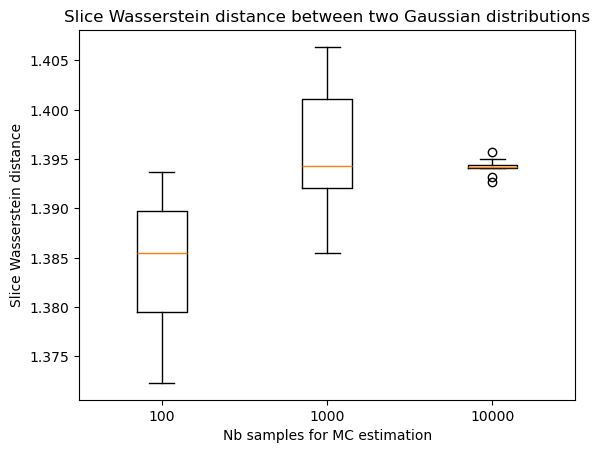

In [9]:
# calculate the Wasserstein distance between two Gaussian distributions with different number of samples
d = 2
mu1 = np.array([0] * d)
mu2 = np.array([1] * d)
sigma = np.eye(d)
nb_samples = [100, 1000, 10_000]
swd1_results = []
for n_samples in nb_samples:
    swd1 = [
        slice_code_student.slice_wasserstein_gaussian(mu1, mu2, sigma, n_samples)
        for _ in range(n_MC_simulations)
    ]
    # Display the results
    print(f"Nb samples: {n_samples}, \tswd1={np.mean(swd1):.5f} +/- {np.var(swd1):.3e}")
    swd1_results.append(swd1)

plt.boxplot(swd1_results)
plt.xticks(range(1, len(nb_samples) + 1), nb_samples)
plt.title("Slice Wasserstein distance between two Gaussian distributions")
plt.xlabel("Nb samples for MC estimation")
plt.ylabel("Slice Wasserstein distance")
plt.show()

> As expected, the variance is reduced with more samples.

Recall also that the $1$ Wasserstein distance between two univariate distributions $\pi_1$ and $\pi_2$ is given by 
$$
W_1(\pi_1,\pi_2) = \int_{0}^1 | F^{\leftarrow}_1(u) -  F^{\leftarrow}_2(u)| \mathrm{d} u,
$$
where $F^{\leftarrow}_i$ is the quantile function associated with $\pi_i$ for $i=1,2$.

Q4. Complete the function slice_wasserstein_generic in slice_code_student.py based on the previous result 

Q5. Illustrate your implementation for $m_1 = \boldsymbol{0}$ and $m_2 = \boldsymbol{1}$, $\sigma_1 = \sigma_2 = \mathrm{Id}$ for dimension $d=2$ using $100$ data samples of $\mu_1$ and $\mu_2$ defined previsouly and varying the number of uniform samples and random directions.

In [ ]:
# Create 2D distributions
d = 2
mu1 = np.array([0] * d)
mu2 = np.array([1] * d)
sigma = np.eye(d)
n_data_samples = 100
nb_mc_samples = 100

rng = np.random.default_rng()
u1_values = rng.multivariate_normal(mu1, sigma, n_data_samples)
u2_values = rng.multivariate_normal(mu2, sigma, n_data_samples)

# Parameter variations
n_slices = [10 * n for n in range(1, 11)]
n_samples = [10 * n for n in range(1, 11)]

# Compute the sliced Wasserstein distance
# sw1_results = np.zeros((len(n_slices), len(n_samples)))
sw1_values = np.zeros((len(n_slices), len(n_samples), nb_mc_samples))
for i, n_slice in enumerate(n_slices):
    for j, n_sample in enumerate(n_samples):
        # MC estimation
        sw1_value = []
        for _ in range(nb_mc_samples):
            sw1 = slice_code_student.slice_wasserstein_generic(
                u1_values, u2_values, n_slice, n_sample
            )
            sw1_value.append(sw1)
        sw1_value = np.array(sw1_value)
        sw1_values[i, j, :] = sw1_value
        # sw1_results[i, j] = np.mean(sw1_value)


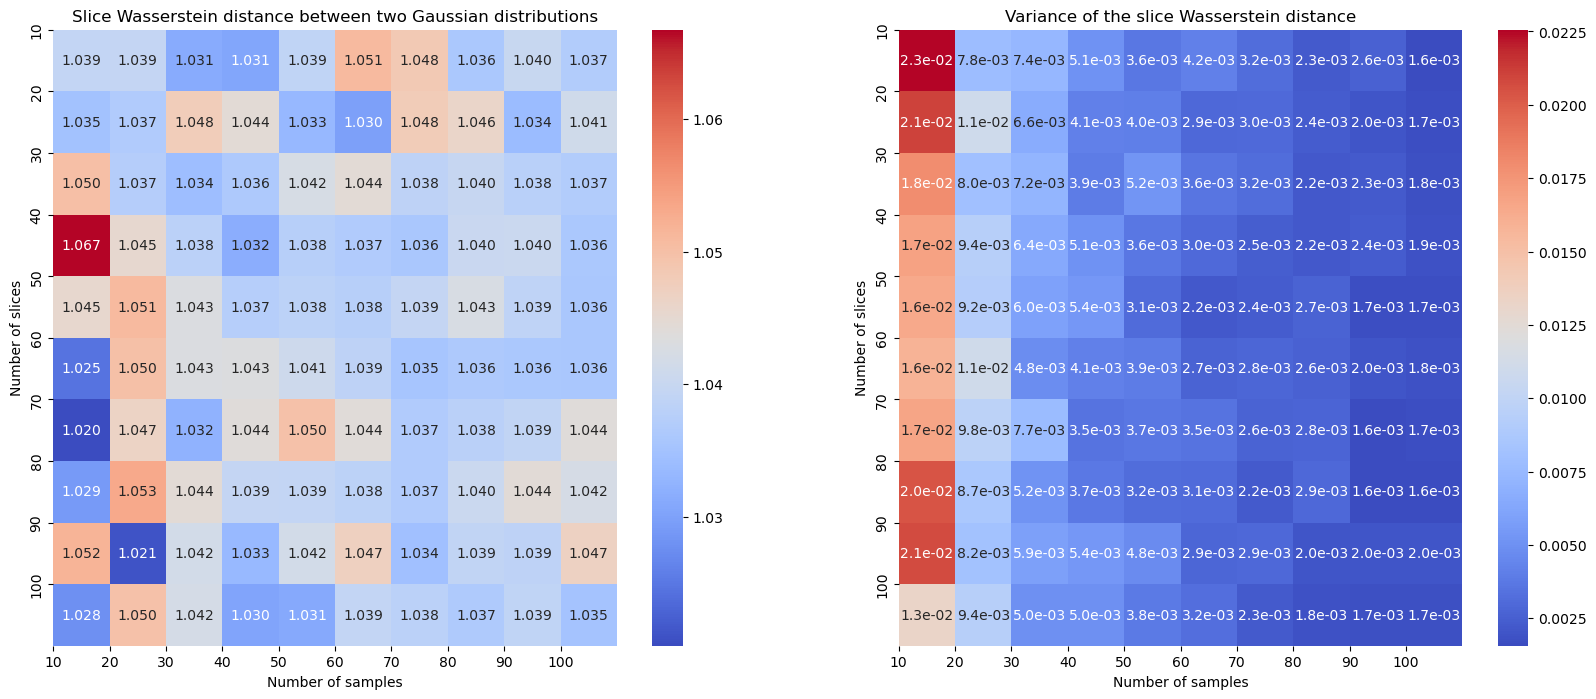

In [41]:
## Plot the results
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
ax1, ax2 = axs
# Value
sns.heatmap(np.mean(sw1_values, axis=2), ax=ax1, cmap="coolwarm", annot=True, fmt=".3f")
ax1.set_title("Slice Wasserstein distance between two Gaussian distributions")
ax1.set_xticks(range(len(n_samples)), n_samples)
ax1.set_xlabel("Number of samples")
ax1.set_yticks(range(len(n_slices)), n_slices)
ax1.set_ylabel("Number of slices")

# variance
sns.heatmap(np.var(sw1_values, axis=2), ax=ax2, cmap="coolwarm", annot=True, fmt=".1e")
ax2.set_title("Variance of the slice Wasserstein distance")
ax2.set_xticks(range(len(n_samples)), n_samples)
ax2.set_xlabel("Number of samples")
ax2.set_yticks(range(len(n_slices)), n_slices)
ax2.set_ylabel("Number of slices")
plt.show()

> As expected, the variance of the slice Wasserstein distance decrease with the number of slices and the number of samples (right plot). The numerical value of the mean result is also more stable. The bottom right part of the left plot display more smooth colors with a higher number of slices and samples.

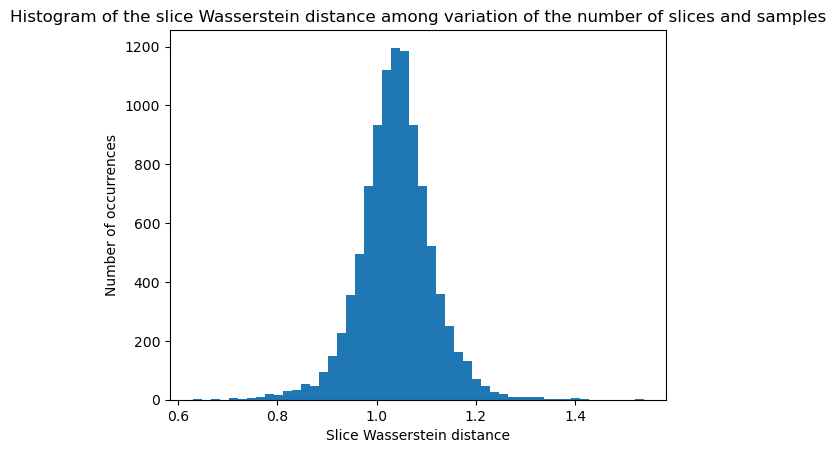

In [44]:
# Show the distribution of the results
all_sw1_values = np.array(sw1_values).flatten()
plt.hist(all_sw1_values, bins=50)
plt.title(
    "Histogram of the slice Wasserstein distance among variation of the number of slices and samples"
)
plt.xlabel("Slice Wasserstein distance")
plt.ylabel("Number of occurrences")
plt.show()

Q6. Illustrate your implementation for $m_1 = \boldsymbol{0}$ and $m_2 = \boldsymbol{1}$, $\sigma_1 = \sigma_2 = \mathrm{Id}$ for dimension $d=1,2,5$ using $100$ uniform samples and $100$ random directions and varying the number of data samples (replications should also be used).

In [65]:
# Create dD distributions
dimensions = [1, 2, 5]
results = []
for d in dimensions:
    mu1 = np.array([0] * d)
    mu2 = np.array([1] * d)
    sigma = np.eye(d)
    n_data_samples = 100
    nb_mc_samples = 100
    n_slice = 100

    rng = np.random.default_rng()
    u1_values = rng.multivariate_normal(mu1, sigma, n_data_samples)
    u2_values = rng.multivariate_normal(mu2, sigma, n_data_samples)

    # Parameter variations
    n_samples = [10 * n for n in range(1, 11)]
    dim_results = []
    for n_sample in n_samples:
        # MC estimation
        sw1_value = []
        for _ in range(nb_mc_samples):
            sw1 = slice_code_student.slice_wasserstein_generic(
                u1_values, u2_values, n_slice, n_sample
            )
            sw1_value.append(sw1)
        dim_results.append(sw1_value)
    results.append(dim_results)

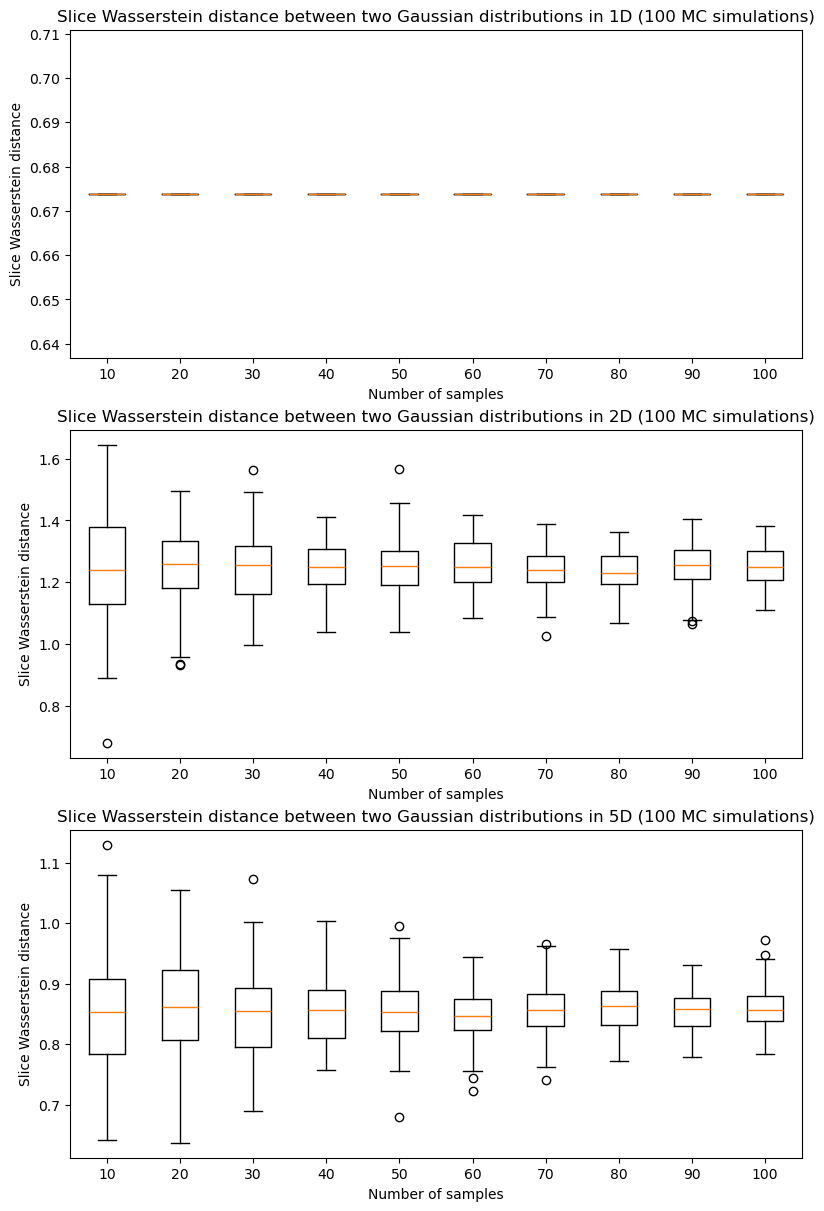

In [78]:
# results = np.array(results)
# Plot the results
fig, axs = plt.subplots(len(dimensions), 1, figsize=(8, 12), layout="constrained")
for i, d in enumerate(dimensions):
    axs[i].boxplot(results[i])
    axs[i].set_title(
        f"Slice Wasserstein distance between two Gaussian distributions in {d}D ({nb_mc_samples} MC simulations)"
    )
    axs[i].set_xticks([1 + n for n in range(len(n_samples))], n_samples)
    axs[i].set_xlabel("Number of samples")
    axs[i].set_ylabel("Slice Wasserstein distance")

> The variance reduces with the number of samples. In 1D, the multiple average on the same dimension reduces the variance and get confident values for the slice Wasserstein distance.

Q7. (Optional) Compare the slice Wasserstein distance between the empirical distributions of the images of $1$ and $7$ from the MNIST dataset with the empirical distributions of the images of $1$ and $8$. Comment your result.

In [86]:
# use the MNIST digit file from a previous lesson, reduced to 1, 7 and 8.
digit_file = np.load("digits.npz")
print(digit_file)
# Specifically name x2, y2 the training data
# normalize the images
digits = digit_file["x"] / 255
digits_label = digit_file["y"]
print(digits.shape, digits_label.shape)
# Select only the 1, 7 and 8
digits_1 = digits[(digits_label == 1).ravel()]
digits_7 = digits[(digits_label == 7).ravel()]
digits_8 = digits[(digits_label == 8).ravel()]
print(digits_1.shape, digits_7.shape, digits_8.shape)


NpzFile 'digits.npz' with keys: xt, yt, y, x
(3000, 784) (3000, 1)
(1000, 784) (1000, 784) (1000, 784)


In [96]:
# For each digit, we have 1000 empirical samples of a distribution in dimension 784
# Parameter variations
n_slices = 10
n_samples = 10
nb_mc_samples = 100
# Compute the sliced Wasserstein distance
labels = ["1->7", "1->8", "7->8"]
# MC estimation
sw1_values_17 = []
sw1_values_18 = []
sw1_values_78 = []
for _ in range(nb_mc_samples):
    sw1_17 = slice_code_student.slice_wasserstein_generic(
        digits_1, digits_7, n_slice, n_sample
    )
    sw1_values_17.append(sw1_17)
    sw1_18 = slice_code_student.slice_wasserstein_generic(
        digits_1, digits_8, n_slice, n_sample
    )
    sw1_values_18.append(sw1_18)
    sw1_78 = slice_code_student.slice_wasserstein_generic(
        digits_7, digits_8, n_slice, n_sample
    )
    sw1_values_78.append(sw1_78)
sw1_values = np.stack([sw1_values_17, sw1_values_18, sw1_values_78])


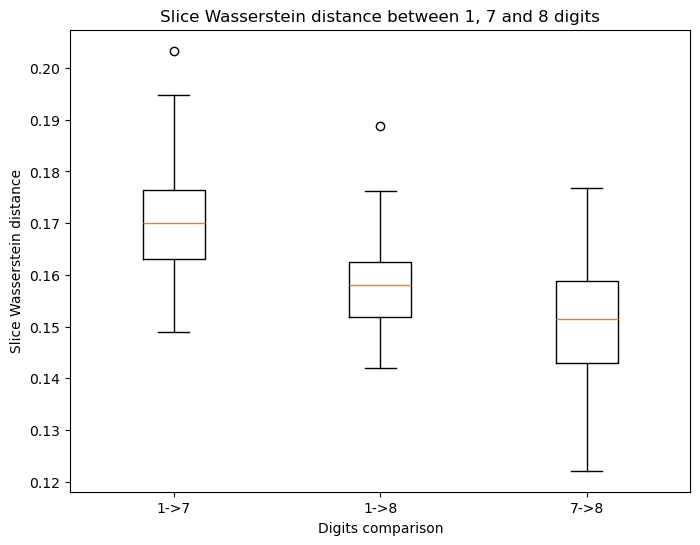

In [ ]:
# plot the distribution of the slice Wasserstein distance
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.boxplot(sw1_values.T)
ax.set_title("Slice Wasserstein distance between 1, 7 and 8 digits")
ax.set_xticks(range(1, 4), labels)
ax.set_xlabel("Digits comparison")
ax.set_ylabel("Slice Wasserstein distance")
plt.show()


> I expected 1 and 7 to be close, but they are in this experiment the farther ones.
> 7 and 8 are the closest, but the variance is the greatest along the samples.
> Let's redo this experiment with more data to reduce the variance.

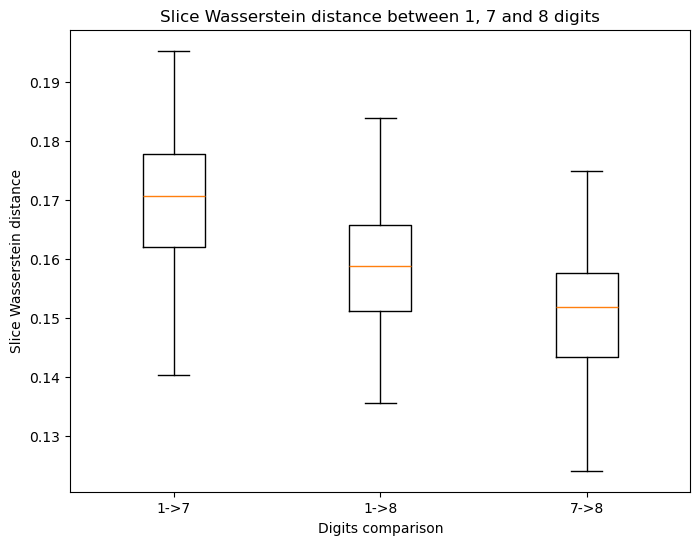

In [ ]:
# For each digit, we have 1000 empirical samples of a distribution in dimension 784
# Parameter variations
n_slices = 1000
n_samples = 500
nb_mc_samples = 100
# Compute the sliced Wasserstein distance
labels = ["1->7", "1->8", "7->8"]
# MC estimation
sw1_values_17 = []
sw1_values_18 = []
sw1_values_78 = []
for _ in range(nb_mc_samples):
    sw1_17 = slice_code_student.slice_wasserstein_generic(
        digits_1, digits_7, n_slice, n_sample
    )
    sw1_values_17.append(sw1_17)
    sw1_18 = slice_code_student.slice_wasserstein_generic(
        digits_1, digits_8, n_slice, n_sample
    )
    sw1_values_18.append(sw1_18)
    sw1_78 = slice_code_student.slice_wasserstein_generic(
        digits_7, digits_8, n_slice, n_sample
    )
    sw1_values_78.append(sw1_78)
sw1_values = np.stack([sw1_values_17, sw1_values_18, sw1_values_78])

# plot the distribution of the slice Wasserstein distance
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.boxplot(sw1_values.T)
ax.set_title("Slice Wasserstein distance between 1, 7 and 8 digits")
ax.set_xticks(range(1, 4), labels)
ax.set_xlabel("Digits comparison")
ax.set_ylabel("Slice Wasserstein distance")
plt.show()


In [109]:
print(f"Average SliceWasserstein distances:")
print(f"- SW1(1->7): {np.mean(sw1_values_17):.5f} +/- {np.var(sw1_values_17):.3e}")
print(f"- SW1(1->8): {np.mean(sw1_values_18):.5f} +/- {np.var(sw1_values_18):.3e}")
print(f"- SW1(7->8): {np.mean(sw1_values_78):.5f} +/- {np.var(sw1_values_78):.3e}")

Average SliceWasserstein distances:
- SW1(1->7): 0.17033 +/- 1.229e-04
- SW1(1->8): 0.15852 +/- 9.416e-05
- SW1(7->8): 0.15082 +/- 1.152e-04


> Results are more stable with more samples, and more slices:
> - SW1(1->7): 0.17033 +/- 1.229e-04
> - SW1(1->8): 0.15852 +/- 9.416e-05
> - SW1(7->8): 0.15082 +/- 1.152e-04
>
> **This confirms that w.r.t. the Slice Wasserstein Distance of order 1, digits 1 is closer to 8 than to 7, and that 7 and 8 are the closest.**

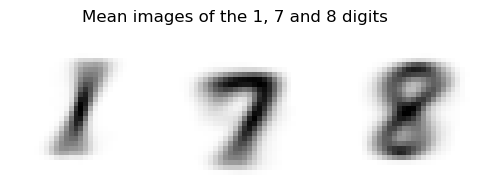

In [111]:
mean_1 = digits_1.mean(axis=0).reshape(28, 28)
mean_7 = digits_7.mean(axis=0).reshape(28, 28)
mean_8 = digits_8.mean(axis=0).reshape(28, 28)
fig, axs = plt.subplots(1, 3, figsize=(6, 2))
for ax, digit in zip(axs, [mean_1, mean_7, mean_8]):
    ax.imshow(digit, cmap="binary")
    ax.axis("off")
fig.suptitle("Mean images of the 1, 7 and 8 digits")
plt.show()

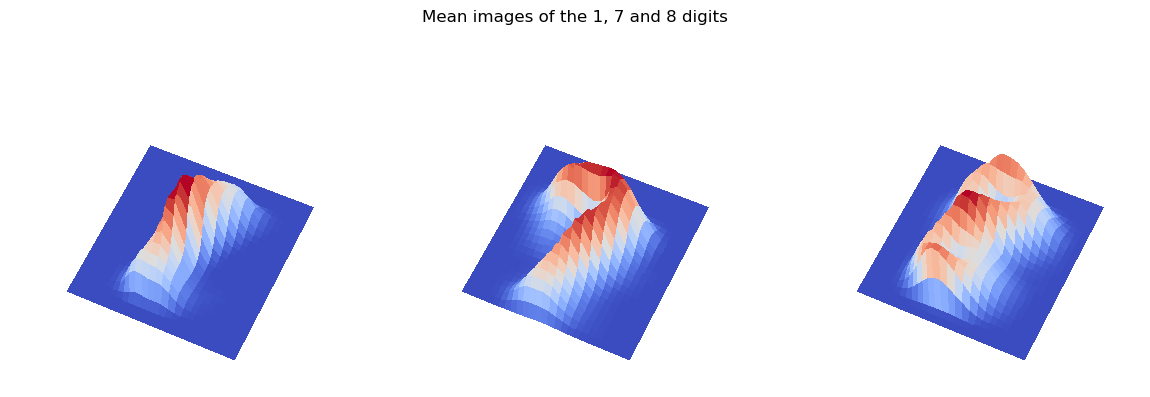

In [ ]:
# Display the mean images with a 3D plot to represent the earth mover distance
X = np.arange(28)
Y = np.arange(28)
X, Y = np.meshgrid(X, Y)
lablels = ["1", "7", "8"]
fig = plt.figure(figsize=(12, 4), layout="tight")
for i_ax, digit in enumerate([mean_1, mean_7, mean_8]):
    ax = fig.add_subplot(1, 3, 1 + i_ax, projection="3d")
    surf = ax.plot_surface(
        X,
        Y,
        digit.T,
        rstride=1,
        cstride=1,
        cmap="coolwarm",
        linewidth=0,
        antialiased=False,
    )
    ax.set_zlim(-0.01, 1.01)
    # fig.colorbar(surf, shrink=0.5, aspect=10)
    ax.axis("off")
    ax.view_init(elev=60.0, azim=35, roll=10)

fig.suptitle("Mean images of the 1, 7 and 8 digits")
plt.show()

> It makes more sense, the 7 has a sharp head, farther away from the center of mass of 1. Hence, the SWD1 is bigger.